Souvenir Sales of Shop X in Queensland, Australia

The file SouvenirSales.xls contains monthly sales for a souvenir shop at a beach resort town in Queensland, Australia between 1995 and 2001.

Back in 2001, the store wanted to use the data to forecase sales for the next 12 months (year 2002). They hired an analyst to generate forecasts. The analyst first partitioned the data into training and validation periods, with the validation period containing the last 12 months of data (year 2001). She then fit a forecasting model to sales, using the training period.

Partition the data into the training and validation periods as explained above.

Table 1.1 - Training and Validation Periods

In [10]:
# Load packages

library(forecast)
library(ggplot2)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [5]:
# Collect data

data <- read.csv("./SouvenirSales.csv")
head(data)

,Date,Sales,X,From.website
,<chr>,<dbl>,<lgl>,<lgl>
1,Jan-95,1664.81,NA,NA
2,Feb-95,2397.53,NA,NA
3,Mar-95,2840.71,NA,NA
4,Apr-95,3547.29,NA,NA
5,May-95,3752.96,NA,NA
6,Jun-95,3714.74,NA,NA


In [6]:
# Pre-process data

data <- data[, -c(3, 4)]
colnames(data)[1]<- "Month"
data.ts <- ts(data[, 2], start = c(1995, 1), end = c(2001, 12), freq = 12)
str(data)

'data.frame':	84 obs. of  2 variables:
 $ Month: chr  "Jan-95" "Feb-95" "Mar-95" "Apr-95" ...
 $ Sales: num  1665 2398 2841 3547 3753 ...


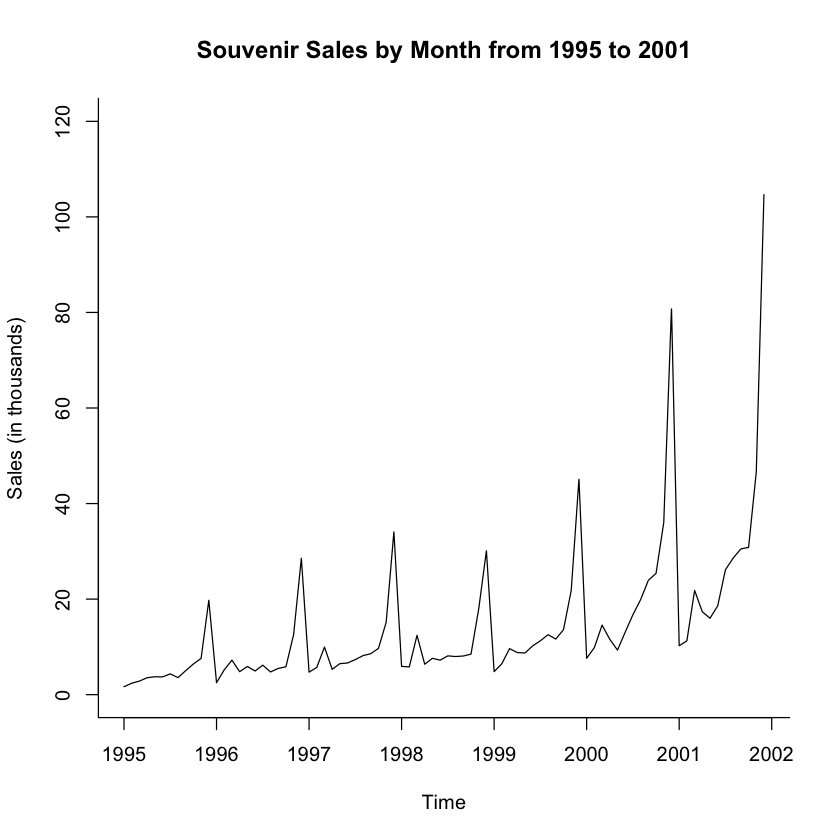

In [7]:
# Explore data

plot(data.ts/1000, ylim = c(0,120), 
     ylab = "Sales (in thousands)", 
     xlab = "Time", 
     main = "Souvenir Sales by Month from 1995 to 2001", 
     bty = "l")

In [8]:
# Partition data

# Partition 66% Training, 34% Validation (1861, 959) 
nValid <- 12
nTrain <- length(data.ts) - nValid
train.ts <- window(data.ts,
                   start = c(1995, 1), 
                   end = c(1995, nTrain))
valid.ts <- window(data.ts,
                   start = c(1995, nTrain + 1),
                   end = c(1995, nTrain + nValid))
head(train.ts)

[1] 1664.81 2397.53 2840.71 3547.29 3752.96 3714.74

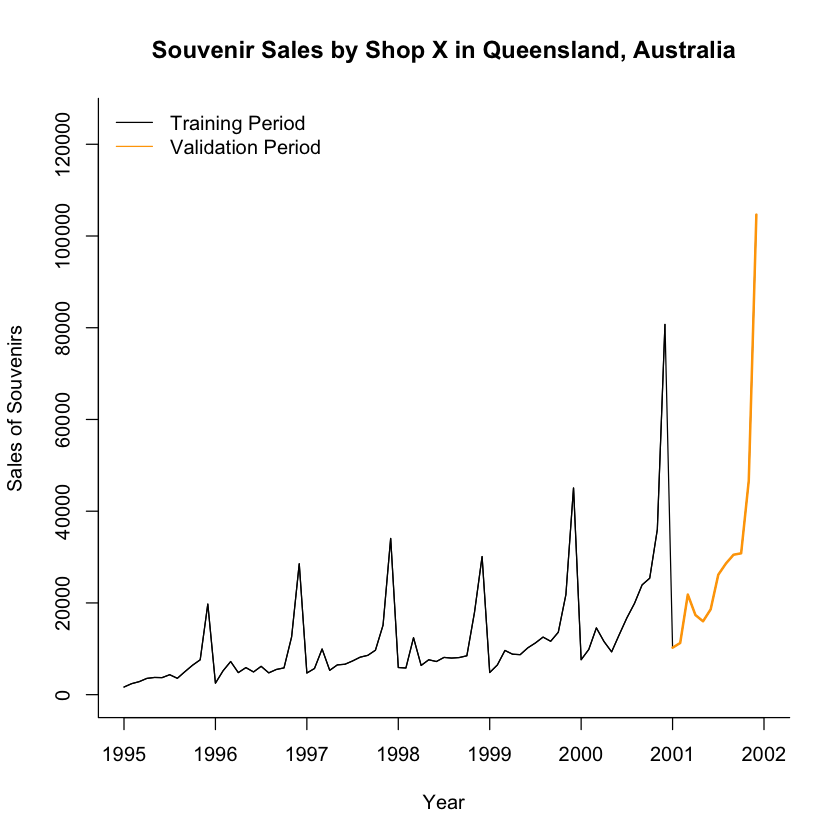

In [2]:
#Upload of the SouvenirSales.csv file that was then partitioned for Training and Validation Periods

Souvenir <- read.csv("./SouvenirSales.csv")
Souvenir.ts <- ts(Souvenir[,2], start = c(1995,1), frequency = 12)
nValid <- 12
nTrain <- length(Souvenir.ts) - nValid
Train.ts <- window(Souvenir.ts, start = c(1995,1), end = c(1995, nTrain))
Valid.ts <- window(Souvenir.ts, start = c(1995, nTrain + 1), end = c(1995, nTrain + nValid))

plot(Train.ts, ylim = c(0, 125000), ylab = "Sales of Souvenirs", 
     main = "Souvenir Sales by Shop X in Queensland, Australia", 
     xlim = c(1995, 2002), xlab = "Year", bty = "l")
lines(Souvenir.ts, col = "black")
lines(Valid.ts, col = "orange", lwd = 2)
legend(x = "topleft", legend = c("Training Period", "Validation Period"), 
       col = c("black", "orange"), lty = c(1, 1), bty = "n")

In [11]:
# Use regression function for time series tslm() to forecasting model with quadratic curve
lm <- tslm(train.ts ~ trend + I(trend^2))
# Forecasting the validation data h horizon
lm.pred <- forecast(lm, h = nValid, level = 0)

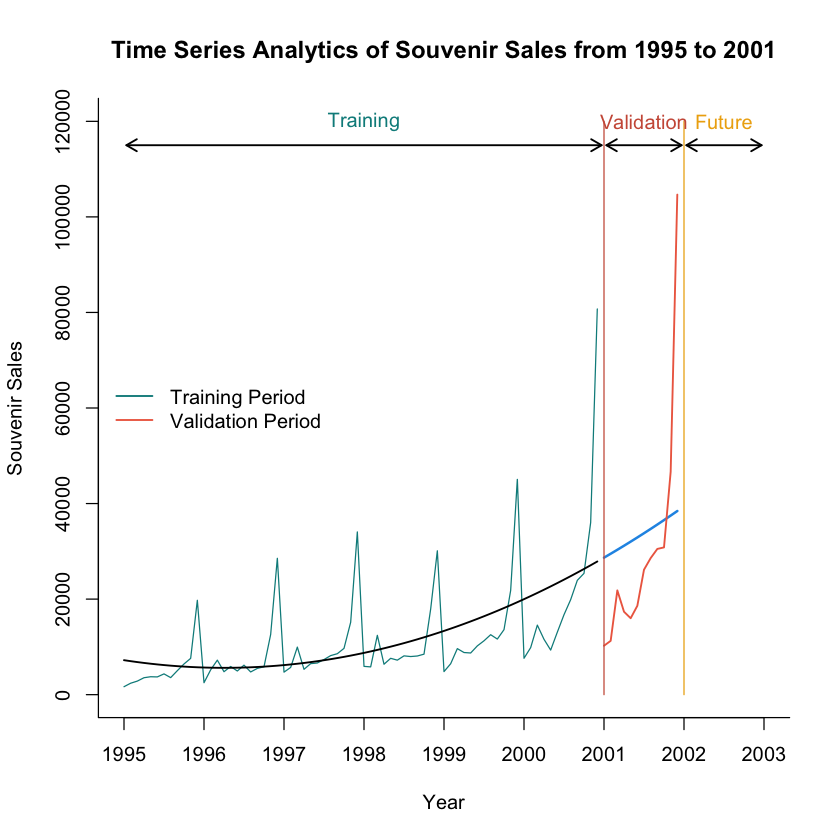

In [12]:
plot(lm.pred,
     xlab = "Year", ylab = "Souvenir Sales", 
     xlim = c(1995, 2003), ylim = c(0, 120000),
     main = "Time Series Analytics of Souvenir Sales from 1995 to 2001",
     bty = "l", xaxt = "n", col = "dark cyan"
     )
axis(1, at = seq(1995, 2003, 1), 
     labels = format(seq(1995, 2003, 1), digits = 2))

lines(lm$fitted, lwd = 1.5, col = "black")
lines(valid.ts, lwd = 1.5, col = "coral2")

lines(c(2001, 2001), c(0, 120000), col = "coral3")
lines(c(2002, 2002), c(0, 120000), col = "darkgoldenrod2")
text((length(train.ts)/12)/2 + 1995, 120000, "Training", col = "dark cyan")
text((length(valid.ts)/12)/2 + 2001, 120000, "Validation", col = "coral3")
text((2002 - 2001)/2 + 2002, 120000, "Future", col = "darkgoldenrod2")
arrows(1995 + .03, 115000, 2001 - .03, 115000,
       code = 3, length = 0.1, lwd = 1.5, angle = 30)
arrows(2001 + .03, 115000, 2002 - .03, 115000,
       code = 3, length = 0.1, lwd = 1.5, angle = 30)
arrows(2002 + .03, 115000, 2003 - .03, 115000,
       code = 3, length = 0.1, lwd = 1.5, angle = 30)

legend(x = "left", 
       legend = c("Training Period", "Validation Period"), 
       col = c("dark cyan", "coral2"), lty = c(1, 1), lwd = c(1.5, 1.5), bty = "n")

In [13]:
# Naive forecast

naive.pred <- naive(train.ts, h = nValid)
names(naive.pred)

[1] "method"    "model"     "lambda"    "x"         "fitted"    "residuals"
 [7] "series"    "mean"      "level"     "lower"     "upper"

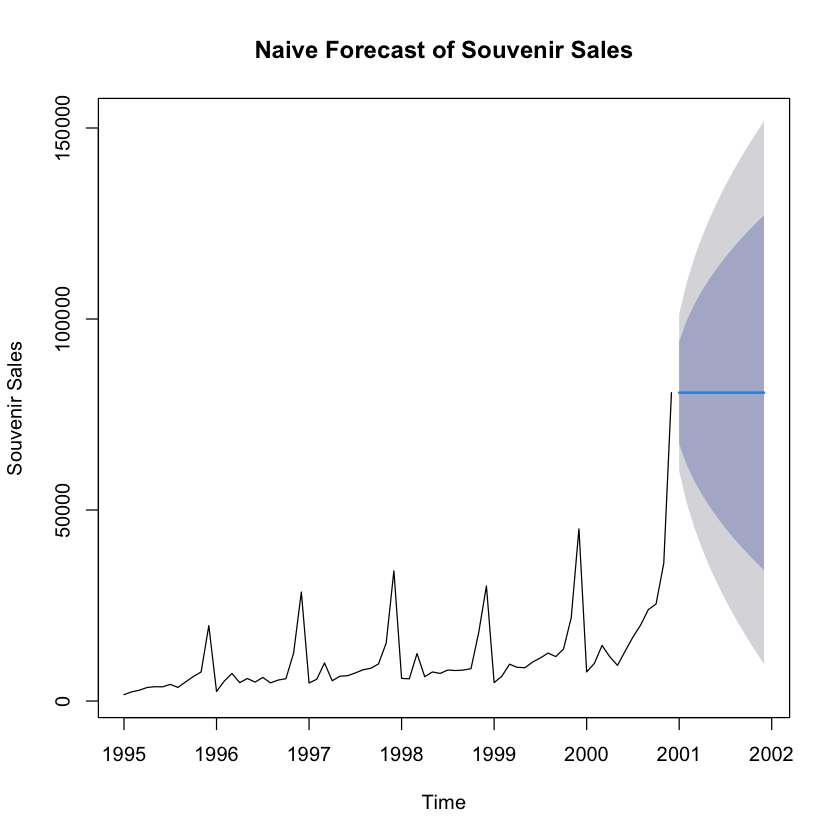

In [14]:
plot(naive.pred,
     ylab = "Souvenir Sales",
     xlab = "Time", 
     main = "Naive Forecast of Souvenir Sales")

In [15]:
snaive.pred <- snaive(train.ts, h = nValid)
names(snaive.pred)

[1] "method"    "model"     "lambda"    "x"         "fitted"    "residuals"
 [7] "series"    "mean"      "level"     "lower"     "upper"

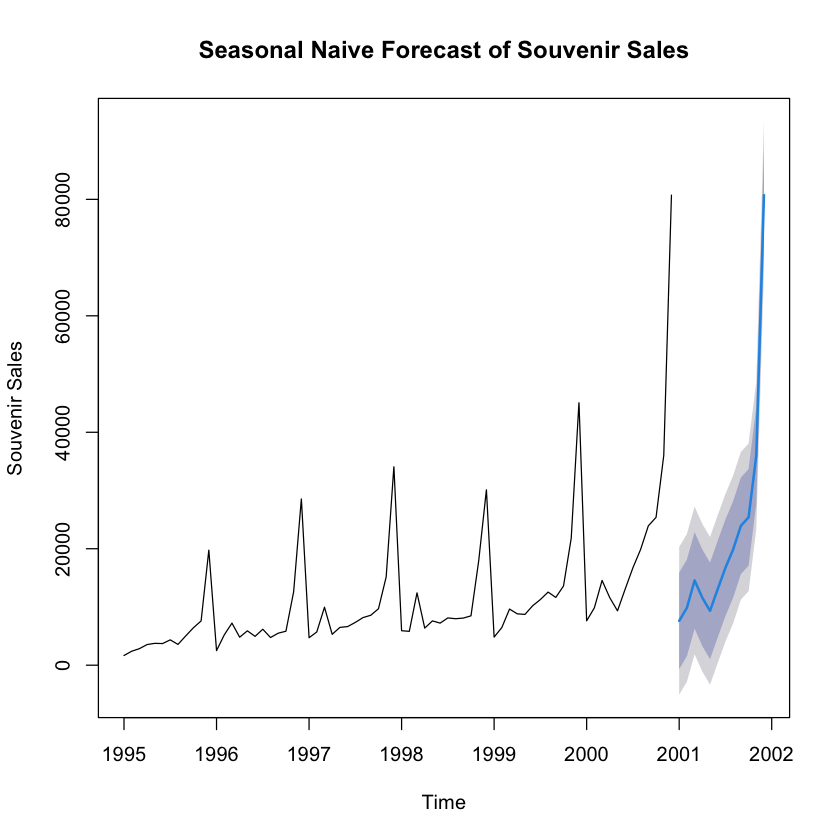

In [16]:
plot(snaive.pred,
     ylab = "Souvenir Sales",
     xlab = "Time", 
     main = "Seasonal Naive Forecast of Souvenir Sales")

In [17]:
# Evaluation

# 1 RMSE and MAPE

accuracy(naive.pred, valid.ts)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,1113.477,10460.73,5506.879,-25.27554,61.16191,1.47054,-0.1968879,NA
Test set,-50500.288,56099.07,54490.114,-287.13834,290.95050,14.55087,0.3182456,6.649124


In [18]:
acc.naive.pred <- accuracy(naive.pred, valid.ts)
acc.snaive.pred <- accuracy(snaive.pred, valid.ts)

In [19]:
acc.index <- c(2, 5)
kable(acc.naive.pred[, acc.index]) # kable function requires knitr package

ERROR: Error in kable(acc.naive.pred[, acc.index]): no se pudo encontrar la función "kable"


In [20]:
kable(acc.snaive.pred[, acc.index])

ERROR: Error in kable(acc.snaive.pred[, acc.index]): no se pudo encontrar la función "kable"


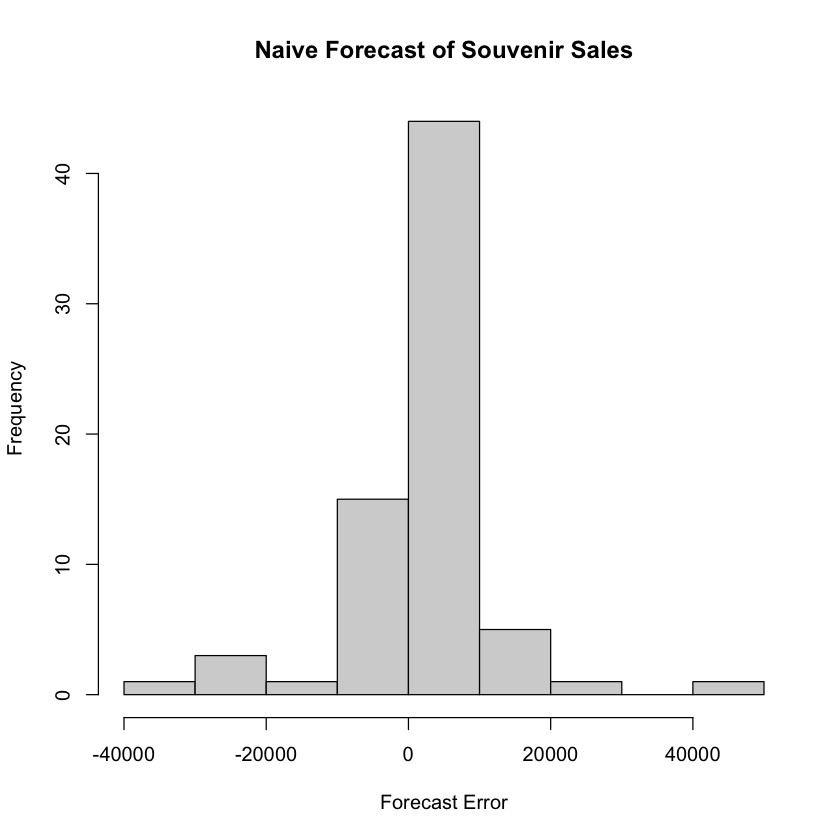

In [21]:
hist(naive.pred$residuals,
     ylab = "Frequency",
     xlab = "Forecast Error", 
     main = "Naive Forecast of Souvenir Sales",
     bty = "l")

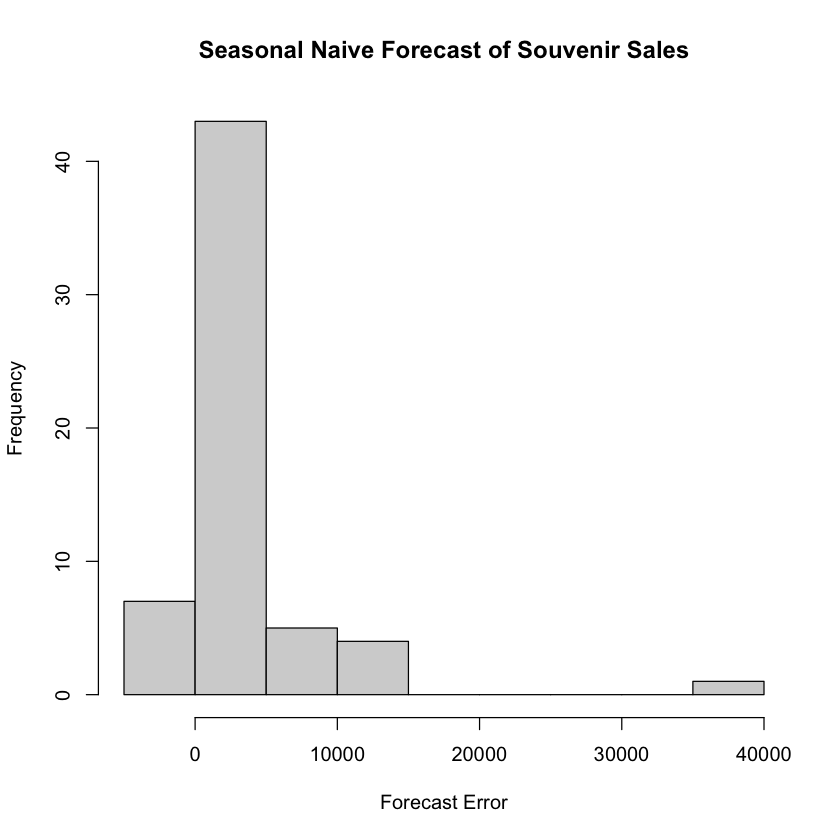

In [22]:
hist(snaive.pred$residuals,
     ylab = "Frequency",
     xlab = "Forecast Error", 
     main = "Seasonal Naive Forecast of Souvenir Sales",
     bty = "l")

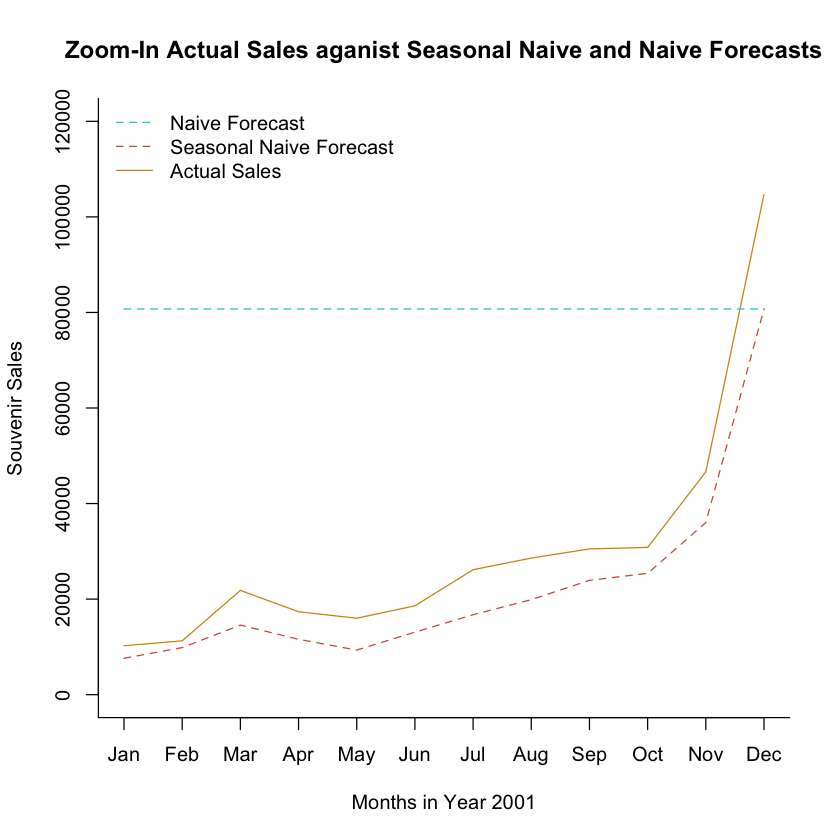

In [23]:
# Time plot of Naive forecasts against actual sales

plot(valid.ts, 
     ylim = c(0, 120000),
     xlab = "Months in Year 2001", ylab = "Souvenir Sales",
     main = "Zoom-In Actual Sales aganist Seasonal Naive and Naive Forecasts",
     bty = "l", xaxt = "n", col = "darkgoldenrod3", lwd = 1
     )

axis(1, 
     at = seq(2001, (2002-1/12), (1/12)),
     labels = c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")
     )

lines(naive.pred$mean, col = "cyan3", lwd = 1, lty = 2)
lines(snaive.pred$mean, col = "coral3", lwd = 1, lty = 2)
legend(x = "topleft", 
       legend = c("Naive Forecast", "Seasonal Naive Forecast", "Actual Sales"), 
       col = c("cyan3", "coral3", "darkgoldenrod3"),
       lty = c(2, 2, 1), bty = "n")

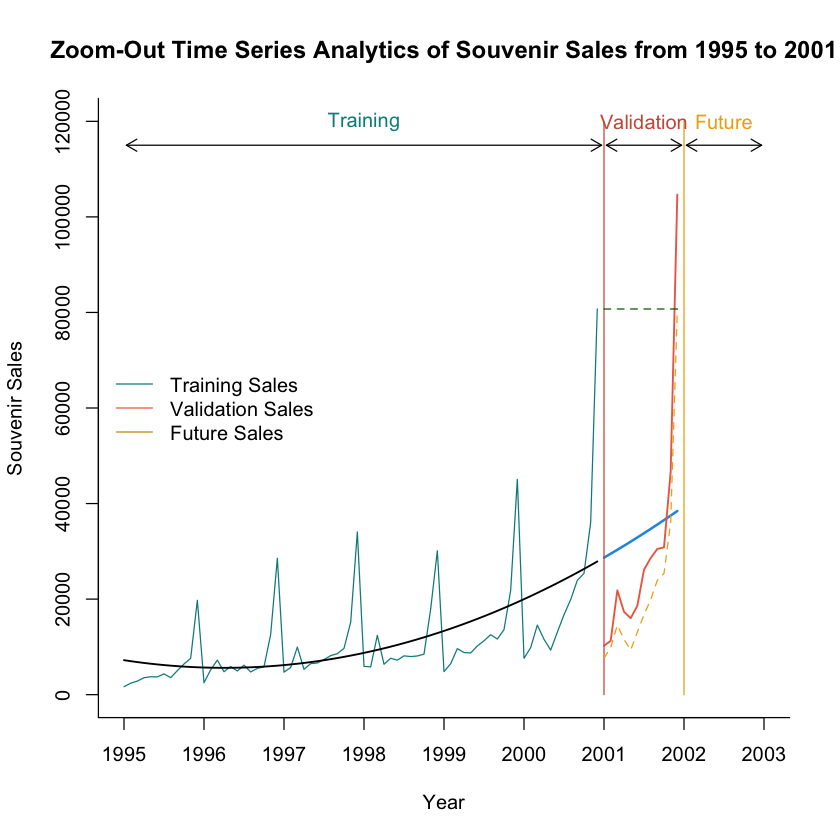

In [24]:
plot(lm.pred,
     xlab = "Year", ylab = "Souvenir Sales", 
     xlim = c(1995, 2003), ylim = c(0, 120000),
     main = "Zoom-Out Time Series Analytics of Souvenir Sales from 1995 to 2001",
     bty = "l", xaxt = "n", col = "dark cyan"
     )
axis(1, at = seq(1995, 2003, 1), 
     labels = format(seq(1995, 2003, 1), digits = 2))

lines(lm$fitted, lwd = 1.5, col = "black")
lines(valid.ts, lwd = 1.5, col = "coral2")

lines(c(2001, 2001), c(0, 120000), col = "coral3")
lines(c(2002, 2002), c(0, 120000), col = "darkgoldenrod2")
text((length(train.ts)/12)/2 + 1995, 120000, "Training", col = "dark cyan")
text((length(valid.ts)/12)/2 + 2001, 120000, "Validation", col = "coral3")
text((2002 - 2001)/2 + 2002, 120000, "Future", col = "darkgoldenrod2")
arrows(1995 + .03, 115000, 2001 - .03, 115000,
       code = 3, length = 0.1, lwd = 1, angle = 30)
arrows(2001 + .03, 115000, 2002 - .03, 115000,
       code = 3, length = 0.1, lwd = 1, angle = 30)
arrows(2002 + .03, 115000, 2003 - .03, 115000,
       code = 3, length = 0.1, lwd = 1, angle = 30)

legend(x = "left", 
       legend = c("Training Sales", "Validation Sales", "Future Sales"), 
       col = c("dark cyan", "coral2", "darkgoldenrod3"), lty = c(1, 1, 1), bty = "n")
lines(snaive.pred$mean, col = "darkgoldenrod2", lwd = 1, lty = 2)
lines(naive.pred$mean, col = "dark green", lwd = 1, lty = 2)